In [2]:
"""
    Edward Pascual-Bautista
    ECGR 4105 HW2
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [7]:
diabetes = pd.DataFrame(pd.read_csv("diabetes.csv"))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
np.random.seed(0)

df_Train, df_Test = train_test_split(diabetes, train_size = 0.8, test_size = 0.2)

In [11]:
df_Train.shape

(614, 9)

In [12]:
df_Test.shape

(154, 9)

In [23]:
X_train = diabetes.iloc[:,[0,1,2,3,4,5,6,7]].values
Y_train = diabetes.iloc[:,8].values
X_test = diabetes.iloc[:,[0,1,2,3,4,5,6,7]].values
Y_test = diabetes.iloc[:,8].values

In [24]:
X_train[0:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

classifer = LogisticRegression(random_state = 0)
classifer.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [29]:
Y_Pred = classifer.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_test, Y_Pred)
cnf_matrix

array([[446,  54],
       [112, 156]], dtype=int64)

In [37]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(Y_test, Y_Pred))
print("Precision: ", metrics.precision_score(Y_test,Y_Pred))
print("Recall: ", metrics.recall_score(Y_test, Y_Pred))

Accuracy:  0.7838541666666666
Precision:  0.7428571428571429
Recall:  0.582089552238806


Text(0.5, 257.44, 'Predicted label')

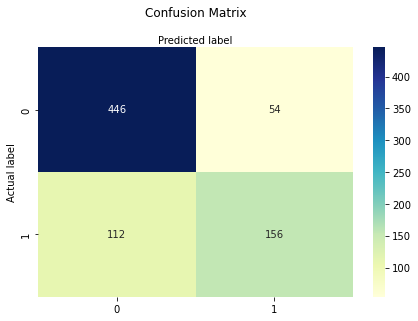

In [39]:
import seaborn as sns

class_names = [0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [63]:
X = diabetes.iloc[:,[0,1,2,3,4,5,6,7]].values
y = diabetes.iloc[:,8].values

In [65]:
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)

model = LogisticRegression(solver = 'liblinear')

results = cross_val_score(model, X, y, cv = kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.425% (3.278%)


In [66]:
kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)

model = LogisticRegression(solver = 'liblinear')

results = cross_val_score(model, X, y, cv = kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.818% (3.744%)
